<a href="https://colab.research.google.com/github/PeggyK1/PeggyK1.github.io/blob/master/Notebook_Successful_Kickstarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries and Loading Main Dataset

In [ ]:
#Have to download dataset from https://www.kaggle.com/kemical/kickstarter-projects (2018 Version)
#Upload from local drive

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
!unzip '/content/kickstarter2018.zip'

Archive:  /content/kickstarter2018.zip
  inflating: ks-projects-201801.csv  


In [76]:
ks = pd.read_csv('/content/ks-projects-2018.csv')

In [77]:
print(ks.shape)
ks.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [78]:
#Replacing country codes with names
ks['country'] = ks['country'].replace({'US':'United States', 'GB':'United Kingdom', 'CA':'Canada', 'AU':'Australia', 'DE':'Germany', 'FR':'France', 'IT':'Italy', 'NL':'Netherlands',
                                      'ES':'Spain', 'SE':'Sweden', 'MX':'Mexico', 'NZ':'New Zealand', 'DK':'Denmark', 'IE':'Ireland', 'CH':'Switzerland',
                                      'NO':'Norway', 'HK':'Hong Kong', 'BE':'Belgium', 'AT':'Austria', 'SG':'Singapore', 'LU':'Luxembourg', 'JP':'Japan', 'N,0"':'Unknown'})

In [79]:
#Checking for NaN
ks.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [80]:
#Not using this column for this project
ks = ks.drop(['usd pledged'], axis=1)

## `Successful Dataset Branch`

In [81]:
#Data of successful kickstarters
ks_s = ks['state']=='successful'
successful = ks[ks_s]
print(successful.shape)
successful.head()

(133956, 14)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,United States,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,United States,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,United States,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,United Kingdom,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,United States,250.00,250.00


## `Failed Dataset Branch`

In [37]:
#Creating Fail Dataset for Product Design
ks_f = ks['state']=='failed'
failed = ks[ks_f]
print(failed.shape)
failed.head()

(197719, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,United Kingdom,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,United States,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,United States,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,United States,1.0,1.0,5000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,United States,453.0,453.0,25000.00


## `Stats`

In [82]:
#Average Pledge Goal for Successful Campaigns
successful['usd_goal_real'].mean()

9532.85335722179

In [83]:
#Max Pledge Goal for Successful Campaigns
successful['usd_goal_real'].max()

2015608.88

In [84]:
#Minimum Pledge Goal for Successful Campaigns
successful['usd_goal_real'].min()

0.01

In [85]:
#Average Pledge Goal for Failed Campaigns
failed['usd_goal_real'].mean()

63174.742222042456

In [86]:
#Max Pledge Goal for Failed Campaigns
failed['usd_goal_real'].max()

166361390.71

In [87]:
#Minimum Pledge Goal for Failed Campaigns
failed['usd_goal_real'].min()

0.15

## Categorical Conditioning

In [88]:
#Conditions
pos = ks['state']=='successful'

In [89]:
#Main Category Conditions
FV = ks['main_category']=='Film & Video'
M = ks['main_category']=='Music'
P = ks['main_category']=='Publishing'
G = ks['main_category']=='Games'
T = ks['main_category']=='Technology'
D = ks['main_category']=='Design'
A = ks['main_category']=='Art'
Fo = ks['main_category']=='Food'
Fa = ks['main_category']=='Fashion'
Th = ks['main_category']=='Theater'
Co = ks['main_category']=='Comics'
Ph = ks['main_category']=='Photography'
Cr = ks['main_category']=='Crafts'
J = ks['main_category']=='Journalism'
Da = ks['main_category']=='Dance'

In [90]:
#Successful Film and Video
film_vid = ks[pos & FV]

film_vid['category'].value_counts()

Shorts             6673
Documentary        5924
Film & Video       3070
Narrative Film     2013
Webseries          1698
Comedy              819
Drama               812
Animation           682
Horror              397
Science Fiction     272
Music Videos        240
Thrillers           200
Television          156
Experimental        147
Festivals           134
Action              107
Fantasy             106
Family               66
Romance              55
Movie Theaters       52
Name: category, dtype: int64

In [91]:
#Total Film and Video
total_film_vid = ks[FV]
total_film_vid['category'].value_counts()

Documentary        16139
Shorts             12357
Film & Video       10108
Webseries           5762
Narrative Film      5188
Animation           2541
Drama               2179
Comedy              2125
Horror              1287
Television          1015
Thrillers            746
Science Fiction      744
Action               740
Music Videos         709
Experimental         551
Fantasy              345
Family               336
Festivals            291
Movie Theaters       232
Romance              190
Name: category, dtype: int64

In [ ]:
#Success Percentages for Film and Video
print("Documentary: ", 5924/16139 )
print("Shorts: ", 6673/12357)
print("Film & Video: ", 3070/10108)
print("Webseries: ", 1698/5762)
print("Narative Film: ", 2013/5188)
print("Animation: ", 682/2541)
print("Drama: ", 812/2179)
print("Comedy: ", 819/2125)
print("Horror: ", 397/1287)
print("Television: ", 156/1015)
print("Thrillers: ", 200/746)
print("Science Fiction: ", 272/744)
print("Action: ", 107/740)
print("Music Videos: ", 240/709)
print("Experimental: ", 147/551)
print("Fantasy: ", 106/345)
print("Festivals: ", 134/291)
print("Family: ", 66/336)
print("Movie Theaters: ", 52/232)
print("Romance: ", 55/190)

Documentary:  0.36706115620546503
Shorts:  0.540017803674031
Film & Video:  0.3037198258804907
Webseries:  0.2946893439777855
Narative Film:  0.3880107941403238
Animation:  0.2683982683982684
Drama:  0.3726480036714089
Comedy:  0.38541176470588234
Horror:  0.3084693084693085
Television:  0.15369458128078817
Thrillers:  0.2680965147453083
Science Fiction:  0.3655913978494624
Action:  0.1445945945945946
Music Videos:  0.3385049365303244
Experimental:  0.26678765880217786
Fantasy:  0.3072463768115942
Festivals:  0.46048109965635736
Family:  0.19642857142857142
Movie Theaters:  0.22413793103448276
Romance:  0.2894736842105263


In [92]:
#Successful Music
music = ks[pos & M]

music['category'].value_counts()

Music               6432
Indie Rock          3618
Rock                3500
Country & Folk      2812
Classical Music     1647
Pop                 1561
Jazz                1104
World Music          922
Electronic Music     700
Hip-Hop              602
Faith                456
Metal                275
Punk                 146
Kids                 126
Blues                117
R&B                  107
Latin                 38
Chiptune              27
Comedy                 7
Name: category, dtype: int64

In [93]:
#Total music
total_music = ks[M]
total_music['category'].value_counts()

Music               15727
Rock                 6758
Indie Rock           5657
Country & Folk       4451
Hip-Hop              3912
Pop                  3350
Classical Music      2613
Electronic Music     2170
World Music          2102
Jazz                 1850
Faith                1092
Metal                 717
R&B                   458
Punk                  317
Kids                  285
Blues                 268
Latin                 137
Chiptune               35
Comedy                 19
Name: category, dtype: int64

In [94]:
#Success Percentage of Favorite and Least Favorite Music Subcategory
print("Music: ", 6432/15727)
print("Comedy: ", 7/19)

Music:  0.40897819037324346
Comedy:  0.3684210526315789


In [95]:
#Successful Publishing
publishing = ks[pos & P]

publishing['category'].value_counts()

Children's Books     2348
Fiction              2233
Nonfiction           2230
Publishing           1640
Art Books            1356
Periodicals           515
Poetry                487
Radio & Podcasts      394
Anthologies           218
Academic              188
Zines                 179
Young Adult           172
Literary Journals     133
Calendars             128
Translations           35
Comedy                 25
Literary Spaces        13
Letterpress             6
Name: category, dtype: int64

In [96]:
#Total Publishing
total_publishing = ks[P]
total_publishing['category'].value_counts()

Fiction              9169
Nonfiction           8318
Children's Books     6756
Publishing           6018
Art Books            2676
Poetry               1369
Periodicals          1265
Radio & Podcasts      923
Academic              916
Young Adult           821
Zines                 391
Anthologies           379
Calendars             329
Literary Journals     278
Translations          153
Comedy                 75
Literary Spaces        27
Letterpress            11
Name: category, dtype: int64

In [97]:
#Succes % of 1st and Least Favorite Subcategory
print("Fiction: ", 2233/9169)
print("Letterpress: ", 6/11)

Fiction:  0.2435380085069255
Letterpress:  0.5454545454545454


In [98]:
#Successful Games
games = ks[pos & G]

games['category'].value_counts()

Tabletop Games     7866
Video Games        2386
Playing Cards       967
Games               779
Live Games          180
Mobile Games        153
Gaming Hardware      99
Puzzles              88
Name: category, dtype: int64

In [99]:
#Total Games
total_games = ks[G]
total_games['category'].value_counts()

Tabletop Games     14180
Video Games        11830
Games               3226
Playing Cards       2497
Mobile Games        1789
Live Games          1050
Gaming Hardware      428
Puzzles              231
Name: category, dtype: int64

In [100]:
#Success % of Fav and Least Games
print("Tabletop Games: ", 7866/14180)
print("Puzzles: ", 88/231)

Tabletop Games:  0.5547249647390691
Puzzles:  0.38095238095238093


In [101]:
#Successful Technology
tech = ks[pos & T]

tech['category'].value_counts()

Technology           1317
Hardware             1206
Gadgets               827
DIY Electronics       417
Wearables             388
Apps                  378
Software              371
Sound                 274
Web                   258
3D Printing           242
Robots                226
Camera Equipment      192
Space Exploration     120
Makerspaces            76
Flight                 76
Fabrication Tools      66
Name: category, dtype: int64

In [102]:
#Total Tech
total_tech = ks[T]
total_tech['category'].value_counts()

Technology           6930
Apps                 6345
Web                  3906
Hardware             3663
Software             3048
Gadgets              2965
Wearables            1233
DIY Electronics       902
3D Printing           683
Sound                 669
Robots                572
Flight                426
Camera Equipment      416
Space Exploration     323
Fabrication Tools     250
Makerspaces           238
Name: category, dtype: int64

In [103]:
#Succes % Top/Bottom Tech
print("Technology: ", 1317/6930)
print("Markerspaces: ", 76/238)

Technology:  0.19004329004329004
Markerspaces:  0.31932773109243695


In [104]:
#Successful Design
design = ks[pos & D]

design['category'].value_counts()

Product Design        7962
Design                1413
Graphic Design         750
Architecture           179
Civic Design           104
Interactive Design      79
Typography              63
Name: category, dtype: int64

In [105]:
#Total Design
total_design = ks[D]
total_design['category'].value_counts()

Product Design        22314
Design                 4199
Graphic Design         2002
Architecture            760
Interactive Design      398
Civic Design            289
Typography              108
Name: category, dtype: int64

In [106]:
#Success % Tob/Bottom Design
print("Product Design: ", 7962/22314)
print("Typography: ", 63/108)

Product Design:  0.3568163484807744
Typography:  0.5833333333333334


In [107]:
#Successful Art
art = ks[pos & A]

art['category'].value_counts()

Art                3385
Illustration       1626
Public Art         1543
Painting           1149
Mixed Media         945
Performance Art     934
Sculpture           698
Digital Art         371
Conceptual Art      366
Installations       233
Ceramics            132
Textiles             77
Video Art            51
Name: category, dtype: int64

In [108]:
#Total Art
total_art = ks[A]
total_art['category'].value_counts()

Art                8253
Painting           3294
Illustration       3175
Public Art         3077
Mixed Media        2757
Performance Art    2154
Sculpture          1810
Digital Art        1346
Conceptual Art     1030
Installations       482
Ceramics            305
Textiles            276
Video Art           194
Name: category, dtype: int64

In [109]:
#Success % Art
print("Art: ", 3385/8253)
print("Video Art: ", 51/194)

Art:  0.4101538834363262
Video Art:  0.26288659793814434


In [110]:
#Successful Food
food = ks[pos & Fo]

food['category'].value_counts()

Food                 3297
Drinks                594
Small Batch           557
Restaurants           457
Farms                 242
Food Trucks           217
Vegan                 185
Cookbooks             130
Spaces                124
Events                108
Farmer's Markets       70
Community Gardens      66
Bacon                  38
Name: category, dtype: int64

In [111]:
#Total Food
total_food = ks[Fo]
total_food['category'].value_counts()

Food                 11493
Restaurants           2819
Drinks                2422
Small Batch           1808
Food Trucks           1752
Farms                 1154
Events                 655
Vegan                  588
Cookbooks              540
Spaces                 428
Farmer's Markets       424
Community Gardens      298
Bacon                  221
Name: category, dtype: int64

In [112]:
#Success % Foods
print("Food: ", 3297/11493)
print("Bacon: ", 38/221)
print("Restaurants: ", 457/2819)



Food:  0.28687026885930567
Bacon:  0.17194570135746606
Restaurants:  0.16211422490244767


In [113]:
#Successful Fashion
fashion = ks[pos & Fa]

fashion['category'].value_counts()

Fashion          2188
Apparel          1414
Accessories      1073
Jewelry           301
Footwear          298
Ready-to-wear     145
Childrenswear      95
Couture            42
Pet Fashion        37
Name: category, dtype: int64

In [114]:
#Total Fashion
total_fashion = ks[Fa]
total_fashion['category'].value_counts()

Fashion          8554
Apparel          7166
Accessories      3165
Jewelry          1239
Footwear          931
Ready-to-wear     864
Childrenswear     483
Couture           275
Pet Fashion       139
Name: category, dtype: int64

In [115]:
#Success % Fashion
print("Fashion: ", 2188/8554)
print("Apparel: ", 1414/7166)
print("Pet Fashion: ", 37/139)

Fashion:  0.2557867664250643
Apparel:  0.1973206809935808
Pet Fashion:  0.26618705035971224


In [116]:
#Successful Theater
theater = ks[pos & Th]

theater['category'].value_counts()

Theater         4405
Plays            804
Musical          462
Festivals        323
Experimental     211
Immersive        169
Spaces            99
Comedy            61
Name: category, dtype: int64

In [117]:
#Total Theater
total_theater = ks[Th]
total_theater['category'].value_counts()

Theater         7057
Plays           1378
Musical          913
Festivals        548
Experimental     373
Immersive        330
Spaces           213
Comedy           101
Name: category, dtype: int64

In [118]:
#Success % Theater
print("Theater: ", 4405/7057)
print("Plays: ", 804/1378)
print("Comedy: ", 61/101)

Theater:  0.624202919087431
Plays:  0.5834542815674891
Comedy:  0.6039603960396039


In [119]:
#Successful Comics
comics = ks[pos & Co]

comics['category'].value_counts()

Comics            2506
Comic Books       1614
Graphic Novels    1011
Webcomics          358
Anthologies        303
Events              50
Name: category, dtype: int64

In [120]:
#Total Comics
total_comics = ks[Co]
total_comics['category'].value_counts()

Comics            4996
Comic Books       2743
Graphic Novels    1864
Webcomics          648
Anthologies        405
Events             163
Name: category, dtype: int64

In [121]:
#Successful % Comics
print("Comics: ", 2506/4996)
print("Comic Books: ", 1614/2743)
print("Events: ", 50/163)

Comics:  0.5016012810248198
Comic Books:  0.5884068538096974
Events:  0.3067484662576687


In [122]:
#Successful Photography
photography = ks[pos & Ph]

photography['category'].value_counts()

Photography    1876
Photobooks      635
Fine Art        283
People          230
Places          118
Nature          100
Animals          63
Name: category, dtype: int64

In [123]:
#Total Photography
total_photography = ks[Ph]
total_photography['category'].value_counts()

Photography    5752
Photobooks     1580
People         1103
Fine Art        776
Places          739
Nature          574
Animals         255
Name: category, dtype: int64

In [124]:
#Successful % Photography
print("Photography: ", 1876/5752)
print("Photobooks: ", 635/1580)
print("Animals: ", 63/255)

Photography:  0.32614742698191934
Photobooks:  0.40189873417721517
Animals:  0.24705882352941178


In [125]:
#Successful Crafts
crafts = ks[pos & Cr]

crafts['category'].value_counts()

Crafts         1162
Woodworking     292
DIY             183
Knitting         85
Stationery       77
Candles          55
Printing         49
Pottery          44
Glass            38
Crochet          35
Weaving          27
Letterpress      25
Quilts           19
Embroidery       19
Taxidermy         5
Name: category, dtype: int64

In [126]:
#Total Crafts
total_crafts = ks[Cr]
total_crafts['category'].value_counts()

Crafts         4664
DIY            1173
Woodworking    1167
Candles         429
Printing        238
Stationery      219
Knitting        181
Crochet         162
Glass           138
Embroidery      113
Pottery         100
Weaving          93
Quilts           81
Letterpress      38
Taxidermy        13
Name: category, dtype: int64

In [127]:
#% Crafts
print("Crafts: ", 1162/4664)
print("DIY: ", 183/1173)
print("Woodworking: ", 292/1167)
print("Taxidermy: ", 5/13)

Crafts:  0.24914236706689538
DIY:  0.15601023017902813
Woodworking:  0.25021422450728364
Taxidermy:  0.38461538461538464


In [128]:
#Successful Journalism
journalism = ks[pos & J]

journalism['category'].value_counts()

Journalism    472
Web           185
Print         161
Audio         111
Video          51
Photo          32
Name: category, dtype: int64

In [129]:
#Total Journalism
total_journalism = ks[J]
total_journalism['category'].value_counts()

Journalism    1747
Web           1247
Print          727
Video          428
Audio          410
Photo          196
Name: category, dtype: int64

In [130]:
#% Journalism
print("Journalism: ", 472/1747)
print("Web: ", 185/1247)
print("Photo: ", 32/196)

Journalism:  0.2701774470520893
Web:  0.1483560545308741
Photo:  0.16326530612244897


In [131]:
#Successful Dance
dance = ks[pos & Da]

dance['category'].value_counts()

Dance           1542
Performances     624
Spaces            72
Residencies       50
Workshops         50
Name: category, dtype: int64

In [132]:
#Total dance
total_dance = ks[Da]
total_dance['category'].value_counts()

Dance           2322
Performances    1013
Spaces           200
Workshops        164
Residencies       69
Name: category, dtype: int64

In [133]:
#% Dance
print("Dance: ", 1542/2322)
print("Performances: ", 624/1013)
print("Residencies: ", 50/69)

Dance:  0.6640826873385013
Performances:  0.6159921026653504
Residencies:  0.7246376811594203


## Visualization of Subcategorical Success Rates

In [134]:
#GRAPH 1 Table
data = {'Main': ['Film & Vid', 'Film & Vid', 'Music', 'Music', 'Publishing', 'Publishing', 'Games', 'Games', 'Tech', 'Tech',
                 'Design', 'Design', 'Art', 'Art', 'Food', 'Food', 'Fashion', 'Fashion', 'Theater', 'Theater', 'Comics', 'Comics',
                 'Photography', 'Photography', 'Crafts', 'Crafts', 'Journalism', 'Journalism', 'Dance', 'Dance'],
        'Sub': ['Documentary', 'Romance', 'Rock', 'Comedy', 'Fiction', 'Letterpress', 'Tabletop', 'Puzzles', 'Technology',
                'Markerspaces', 'Product Design', 'Typography', 'Illustration', 'Video Art', 'Food', 'Bacon', 'Fashion', 'Pet Fashion',
                'Theater', 'Comedy', 'Comic Books', 'Events', 'Photobooks', 'Animals', 'DIY', 'Taxidermy', 'Journalism', 'Photo', 'Performances', 'Residencies'],
        'Popularity': ['p', 'u', 'p', 'u', 'p', 'u', 'p', 'u', 'p', 'u',
                       'p', 'u', 'p', 'u', 'p', 'u', 'p', 'u', 'p', 'u',
                       'p', 'u', 'p', 'u', 'p', 'u', 'p', 'u', 'p', 'u'],
        'Success_Rate': [36, 28, 93, 36, 24, 54, 55, 38, 19, 31, 35, 58, 51, 26, 28, 17, 25, 26, 62, 60, 58, 30, 40, 24, 15, 38, 27, 16, 61,72]}

bar1 = pd.DataFrame(data)
bar1.head()

,Main,Sub,Popularity,Success_Rate
0,Film & Vid,Documentary,p,36
1,Film & Vid,Romance,u,28
2,Music,Rock,p,93
3,Music,Comedy,u,36
4,Publishing,Fiction,p,24


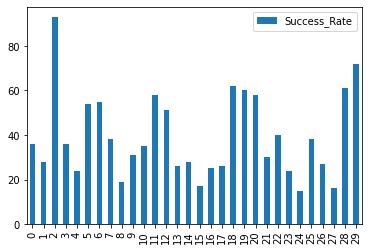

In [135]:
bar1.plot.bar();

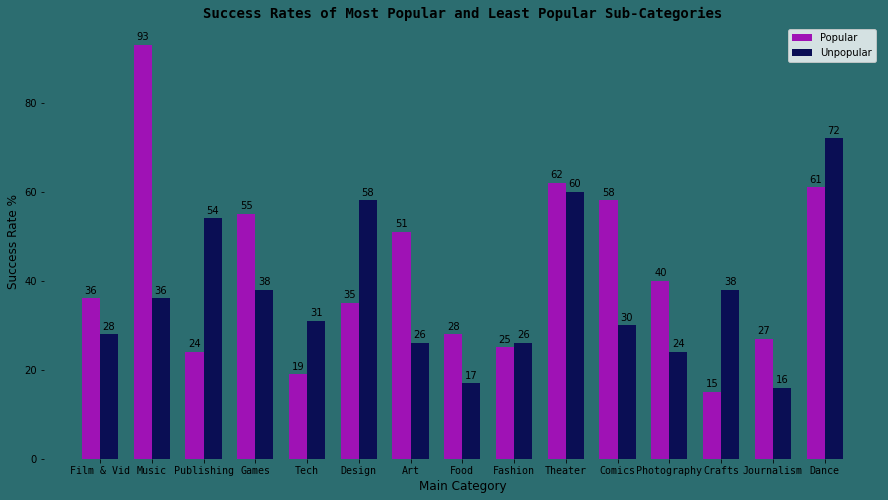

In [136]:
#Creating figure, controlling size and color
fig = plt.figure(figsize=(15, 8), facecolor='#2c6d70')

#Adding subplot with no frame
ax = plt.subplot(frameon=False)

#X Labels
labels = ['Film & Vid', 'Music', 'Publishing', 'Games', 'Tech', 'Design', 'Art', 'Food', 'Fashion', 'Theater', 'Comics', 'Photography', 'Crafts', 'Journalism', 'Dance']
x = np.arange(len(labels))
#Width of bars
width = 0.35

#Rates
pop_rates = [36, 93, 24, 55, 19, 35, 51, 28, 25, 62, 58, 40, 15, 27, 61]
unpop_rates = [28, 36, 54, 38, 31, 58, 26, 17, 26, 60, 30, 24, 38, 16, 72]

#Bars
rects1 = ax.bar(x-width/2, pop_rates, width, label='Popular', color='#9f12b5')
rects2 = ax.bar(x+width/2, unpop_rates, width, label='Unpopular', color='#0a0e54')

#Titles, text, and labels
ax.set_ylabel('Success Rate %', fontsize='12')
ax.set_xlabel('Main Category', fontsize='12')
ax.set_title('Success Rates of Most Popular and Least Popular Sub-Categories', fontsize='14', fontweight='bold', fontfamily='monospace')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontfamily='monospace')
ax.legend()

#Attaching text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

plt.show();


In [137]:
bar1['Popularity'] = bar1['Popularity'].replace({'u':'Unpopular', 'p':'Popular'})

In [138]:
#Table of Subcategory Success Rates
import plotly.graph_objects as go

In [139]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(bar1.columns),
                fill_color='#3e87b7',
                align='left',
                font=dict(color='white', size=12)),
    cells=dict(values=[bar1.Main, bar1.Sub, bar1.Popularity, bar1.Success_Rate],
               fill_color='lavender',
               align='left'))
])

fig.show()

## Category Table

In [140]:
cat_data = {'Rank': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'Category': ['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design', 'Art',
                                    'Food', 'Fashion', 'Theater', 'Comics','Photography', 'Crafts', 'Journalism', 'Dance'],
            'Success_Rate': [37, 47, 31, 36, 20, 35, 41, 25, 25, 60, 54, 31, 24, 21, 62]}

category = pd.DataFrame(cat_data)
   

In [141]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(category.columns),
                fill_color='#3e87b7',
                align='center',
                font=dict(color='white', size=12)),
    cells=dict(values=[category.Rank, category.Category, category.Success_Rate],
               fill_color='lavender',
               align='center'))
])

fig.update_layout(width=500, height=600)
fig.show()

## Main Category Success Rates

In [142]:
#Film and Video Success Rate
fvsr1 = successful[FV]
fvsr2 = ks[FV]
fv = len(fvsr1.index) / len(fvsr2.index)
fv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.3715184398836204

In [145]:
#Music Success Rate
msr1 = successful[M]
msr2 = ks[M]
m = len(msr1.index) / len(msr2.index)
m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.466061866789938

In [146]:
#Publishing Success Rate
psr1 = successful[P]
psr2 = ks[P]
len(psr1.index)/len(psr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.30847168581030243

In [147]:
#Games Success Rate
gsr1 = successful[G]
gsr2 = ks[G]
len(gsr1.index)/len(gsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.35531208310862594

In [148]:
#Technology Success Rate
tsr1 = successful[T]
tsr2 = ks[T]
len(tsr1.index)/len(tsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.19754981731093985

In [149]:
#Design Success Rate
dsr1 = successful[D]
dsr2 = ks[D]
len(dsr1.index)/len(dsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.35084802128367143

In [ ]:
#Art Success Rate
asr1 = successful[A]
asr2 = ks[A]
len(asr1.index)/len(asr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.408837424075587

In [150]:
#Food Success Rate
fosr1 = successful[Fo]
fosr2 = ks[Fo]
len(fosr1.index)/len(fosr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.24733761482806277

In [151]:
#Fashion Success Rate
fasr1 = successful[Fa]
fasr2 = ks[Fa]
len(fasr1.index)/len(fasr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.2451349929873773

In [152]:
#Theater Success Rate
thsr1 = successful[Th]
thsr2 = ks[Th]
len(thsr1.index)/len(thsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.5987354531292953

In [153]:
#Comic Success Rate
cosr1 = successful[Co]
cosr2 = ks[Co]
len(cosr1.index)/len(cosr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.5399759682040854

In [154]:
#Photography Success Rate
phsr1 = successful[Ph]
phsr2 = ks[Ph]
len(phsr1.index)/len(phsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.3066147137953428

In [155]:
#Crafts Success Rate
crsr1 = successful[Cr]
crsr2 = ks[Cr]
len(crsr1.index)/len(crsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.24009535702122828

In [156]:
#Journalism Success Rate
jsr1 = successful[J]
jsr2 = ks[J]
len(jsr1.index)/len(jsr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.2128286014721346

In [157]:
#Dance Success Rate
dasr1 = successful[Da]
dasr2 = ks[Da]
len(dasr1.index)/len(dasr2.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.6204883227176221

In [158]:
#Main Categorical Success Rate Database
main_cat_sr = {'Main_Cat': ['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Design', 'Art',
                                    'Food', 'Fashion', 'Theater', 'Comics','Photography', 'Crafts', 'Journalism', 'Dance'],
                'Success_Rate_%': [37, 46, 30, 35, 19, 35, 40, 24, 24, 59, 53, 30, 24, 21, 62]}

Main = pd.DataFrame(main_cat_sr)


In [159]:
Main.head(15)

,Main_Cat,Success_Rate_%
0,Film & Video,37
1,Music,46
2,Publishing,30
3,Games,35
4,Technology,19
5,Design,35
6,Art,40
7,Food,24
8,Fashion,24
9,Theater,59


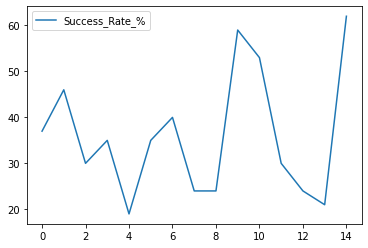

In [160]:
Main.plot()
plt.show()

## Location Conditions

In [161]:
#Country Conditions
US = ks['country']=='United States'
GB = ks['country']=='United Kingdom'
CA = ks['country']=='Canada'
AU = ks['country']=='Australia'
DE = ks['country']=='Germany'

FR = ks['country']=='France'
IT = ks['country']=='Italy'
NL = ks['country']=='Netherlands'
ES = ks['country']=='Spain'
SE = ks['country']=='Sweden'

MX = ks['country']=='Mexico'
NZ = ks['country']=='New Zealand'
DK = ks['country']=='Denmark'
IE = ks['country']=='Ireland'
CH = ks['country']=='Switzerland'

NO = ks['country']=='Norway'
HK = ks['country']=='Hong Kong'
BE = ks['country']=='Belgium'
AT = ks['country']=='Austria'
SG = ks['country']=='Singapore'

LU = ks['country']=='Luxembourg'
JP = ks['country']=='Japan'
UK = ks['country']=='Unknown'

In [162]:
#US Success Rate
usks1 = successful[US]
usks2 = ks[US]
print("Total Pop %: ", len(usks2.index)/len(ks.index))
print("Success Rate: ", len(usks1.index)/len(usks2.index))

Total Pop %:  0.7727941351235009
Success Rate:  0.3735096214635013


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [163]:
#United Kingdom Success Rate
gbks1 = successful[GB]
gbks2 = ks[GB]
print("Total Pop %: ", len(gbks2.index)/len(ks.index))
print("Success Rate: ",len(gbks1.index)/len(gbks2.index))

Total Pop %:  0.08892386593813464
Success Rate:  0.3583689712520789


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [164]:
#Canadian Success Rate CA
caks1 = successful[CA]
caks2 = ks[CA]
print("Total Pop %: ", len(caks2.index)/len(ks.index))
print("Success Rate: ", len(caks1.index)/len(caks2.index))

Total Pop %:  0.03896889302040611
Success Rate:  0.28015722417999456


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [165]:
#Australian Success Rate AU
auks1 = successful[AU]
auks2 = ks[AU]
print("Total Pop %: ", len(auks2.index)/len(ks.index))
print("Success Rate: ", len(auks1.index)/len(auks2.index))

Total Pop %:  0.02070189430651691
Success Rate:  0.2564102564102564


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [166]:
#German Success Rate DE
deks1 = successful[DE]
deks2 = ks[DE]
print("Total Pop %: ", len(deks2.index)/len(ks.index))
print("Success Rate: ", len(deks1.index)/len(deks2.index))

Total Pop %:  0.011015129627820135
Success Rate:  0.22464636777751137


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [167]:
#French Success Rate FR
frks1 = successful[FR]
frks2 = ks[FR]
print("Total Pop %: ", len(frks2.index)/len(ks.index))
print("Success Rate: ", len(frks1.index)/len(frks2.index))

Total Pop %:  0.007761559812074653
Success Rate:  0.3089486219802654


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [168]:
#Italian Success Rate IT
itks1 = successful[IT]
itks2 = ks[IT]
print("Total Pop %: ", len(itks2.index)/len(ks.index))
print("Success Rate: ", len(itks1.index)/len(itks2.index))

Total Pop %:  0.0076004658520418
Success Rate:  0.15253648366921474


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [169]:
#Netherlands Success Rate NL
nlks1 = successful[NL]
nlks2 = ks[NL]
print("Total Pop %: ", len(nlks2.index)/len(ks.index))
print("Success Rate: ", len(nlks1.index)/len(nlks2.index))

Total Pop %:  0.0075740570061347745
Success Rate:  0.21513249651324964


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [170]:
#Spanish Success Rate ES
esks1 = successful[ES]
esks2 = ks[ES]
print("Total Pop %: ", len(esks2.index)/len(ks.index))
print("Success Rate: ", len(esks1.index)/len(esks2.index))

Total Pop %:  0.006010653328438894
Success Rate:  0.21616871704745166


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [171]:
#Swedish Success Rate SE
seks1 = successful[SE]
seks2 = ks[SE]
print("Total Pop %: ", len(seks2.index)/len(ks.index))
print("Success Rate: ", len(seks1.index)/len(seks2.index))

Total Pop %:  0.0046400342258642955
Success Rate:  0.2896983494593056


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [172]:
#Mexican Success Rate MX
mxks1 = successful[MX]
mxks2 = ks[MX]
print("Total Pop %: ", len(mxks2.index)/len(ks.index))
print("Success Rate: ", len(mxks1.index)/len(mxks2.index))

Total Pop %:  0.004626829802910783
Success Rate:  0.22602739726027396


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [173]:
# New Zealand Success Rate NZ
nzks1 = successful[NZ]
nzks2 = ks[NZ]
print("Total Pop %: ", len(nzks2.index)/len(ks.index))
print("Success Rate: ", len(nzks1.index)/len(nzks2.index))

Total Pop %:  0.00382136000274652
Success Rate:  0.30960608154803043


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#Denmark Success Rate DK
dkks1 = successful[DK]
dkks2 = ks[DK]
print("Total Pop %: ", len(dkks2.index)/len(ks.index))
print("Success Rate: ", len(dkks1.index)/len(dkks2.index))

Total Pop %:  0.0029393045494518844
Success Rate:  0.32345013477088946


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [174]:
#Irish Success Rate IE
ieks1 = successful[IE]
ieks2 = ks[IE]
print("Total Pop %: ", len(ieks2.index)/len(ks.index))
print("Success Rate: ", len(ieks1.index)/len(ieks2.index))

Total Pop %:  0.002141757403059729
Success Rate:  0.25524044389642414


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [175]:
#Switzerland Success Rate CH
chks1 = successful[CH]
chks2 = ks[CH]
print("Total Pop %: ", len(chks2.index)/len(ks.index))
print("Success Rate: ", len(chks1.index)/len(chks2.index))

Total Pop %:  0.0020097131735246038
Success Rate:  0.2457293035479632


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [176]:
#Norse Success Rate NO
noks1 = successful[NO]
noks2 = ks[NO]
print("Total Pop %: ", len(noks2.index)/len(ks.index))
print("Success Rate: ", len(noks1.index)/len(noks2.index))

Total Pop %:  0.0018697462902173712
Success Rate:  0.2288135593220339


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [177]:
#Hong Kong Success Rate HK
hkks1 = successful[HK]
hkks2 = ks[HK]
print("Total Pop %: ", len(hkks2.index)/len(ks.index))
print("Success Rate: ", len(hkks1.index)/len(hkks2.index))

Total Pop %:  0.001632066677054146
Success Rate:  0.34951456310679613


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [178]:
#Belgium Success Rate BE
beks1 = successful[BE]
beks2 = ks[BE]
print("Total Pop %: ", len(beks2.index)/len(ks.index))
print("Success Rate: ", len(beks1.index)/len(beks2.index))

Total Pop %:  0.0016294257924634435
Success Rate:  0.24635332252836303


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [179]:
#Austrian Success Rate AT
atks1 = successful[AT]
atks2 = ks[AT]
print("Total Pop %: ", len(atks2.index)/len(ks.index))
print("Success Rate: ", len(atks1.index)/len(atks2.index))

Total Pop %:  0.0015766081006493935
Success Rate:  0.17922948073701842


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [180]:
#Singapore Success Rate SG
sgks1 = successful[SG]
sgks2 = ks[SG]
print("Total Pop %: ", len(sgks2.index)/len(ks.index))
print("Success Rate: ", len(sgks1.index)/len(sgks2.index))

Total Pop %:  0.0014656909478398884
Success Rate:  0.3207207207207207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [181]:
#Luxembourg Success Rate LU
luks1 = successful[LU]
luks2 = ks[LU]
print("Total Pop %: ", len(luks2.index)/len(ks.index))
print("Success Rate: ", len(luks1.index)/len(luks2.index))

Total Pop %:  0.0001637348446235551
Success Rate:  0.3064516129032258


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [182]:
#Japanese Success Rate JP
jpks1 = successful[JP]
jpks2 = ks[JP]
print("Total Pop %: ", len(jpks2.index)/len(ks.index))
print("Success Rate: ", len(jpks1.index)/len(jpks2.index))

Total Pop %:  0.00010563538362810007
Success Rate:  0.175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [183]:
#Unknown Location Success Rate UK
ukks1 = successful[UK]
ukks2 = ks[UK]
print("Total Pop %: ", len(ukks2.index)/len(ks.index))
print("Success Rate: ", len(ukks1.index)/len(ukks2.index))

Total Pop %:  0.0100274387908974
Success Rate:  0.027653410587305766


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Population Donut Chart

In [184]:
#Donut Chart Database
population = {'Country': ['US', 'GB', 'CA', 'AU', 'DE', 'FR', 'IT', 'NL',
                          'ES', 'SE', 'MX', 'NZ', 'DK', 'IE', 'CH', 'NO',
                          'HK', 'BE', 'AT', 'SG', 'LU', 'JP', 'UK'],
              'Pop %': [77.3, 8.98, 3.8, 2.07, 1.1, .776, .76, .757, .6, .464, .46, .382,
                        .294, .214, .2, .187, .163, .163, .157, .147, .016, .01, 1]}

pop = pd.DataFrame(population)
print(pop.shape)
pop.head()


(23, 2)


,Country,Pop %
0,US,77.30
1,GB,8.98
2,CA,3.80
3,AU,2.07
4,DE,1.10


In [185]:
pop['Pop %'].sum()

100.0

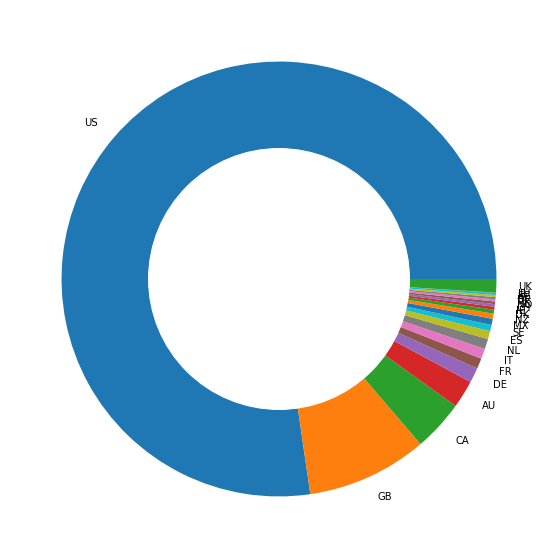

In [186]:
#Data
names=pop['Country']
size=pop['Pop %']
#Center Circle
my_circle=plt.Circle( (0,0), .6, color='white')

#Figure size
fig = plt.figure(figsize=(10,10))

#Donut Plot
plt.pie(size, labels=names)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show();

##World Map with Plotly

In [187]:
import plotly.graph_objects as go
import pandas as pd

In [188]:
#Geographical Success Rate Database
geography = {'Country':['USA', 'GBR', 'CAN', 'AUS', 'DEU', 'FRA', 'ITA', 'NLD', 'ESP', 'SWE',
                        'MEX', 'NZL', 'DNK', 'IRL', 'CHE', 'NOR', 'HKG', 'BEL', 'AUT', 'SGP', 'LUX', 'JPN'],
             'Success_%':[37,36,28,26,22,31,15,22,22,29,23,31,32,26,25,23,35,25,18,32,31,18]}

geog = pd.DataFrame(geography)

In [189]:
#Heatmap

fig = go.Figure(data=go.Choropleth(
    locations = geog['Country'],
    z = geog['Success_%'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Success Rate %'
))

fig.update_layout(
    title_text='Success Rate by Location',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )

)

fig.show()

##Backers

In [190]:
#Under 10 Backers
less_10_b = successful['backers'] < 10
bk_10 = successful[less_10_b]
len(bk_10.index)/len(successful.index)

0.04064021021828063

In [191]:
#Under 25 Backers
less_25_b = successful['backers'] < 25
bk_25 = successful[less_25_b]
len(bk_25.index)/len(successful.index)

0.1757517393771089

In [192]:
#Under 50 Backers
less_50_b = successful['backers'] < 50
bk_50 = successful[less_50_b]
len(bk_50.index)/len(successful.index)

0.37804204365612587

In [193]:
#Under 75 Backers
less_75_b = successful['backers'] < 75
bk_75 = successful[less_75_b]
len(bk_75.index)/len(successful.index)

0.5175505389829497

In [194]:
#Under 100 Backers
less_100_b = successful['backers'] < 100
bk_100 = successful[less_100_b]
len(bk_100.index)/len(successful.index)

0.6100286661291767

In [195]:
#Under 500
less_500_b = successful['backers'] < 500
bk_500 = successful[less_500_b]
len(bk_500.index)/len(successful.index)

0.9106199050434471

## Backer Table

In [196]:
back_data = {'Backers':['<10', '<25', '<50', '<75', '<100', '<500'],
             'Success_Population':['4%', '18%', '38%', '52%', '61%', '91%']
}

backers = pd.DataFrame(back_data)

In [197]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(backers.columns),
                fill_color='#3c6633',
                align='center',
                font=dict(color='white', size=12)),
    cells=dict(values=[backers.Backers, backers.Success_Population],
               fill_color='#a3ef28',
               align='center'))
])

fig.update_layout(width=500, height=500)
fig.show()